In [1]:
from mario_scenes.load_data import load_scenes_info
from mario_replays.load_data import load_replay_data
import os
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load data

scenes_mastersheet = load_scenes_info(format='df')
# Drop Entry Point and Exit Point columns
scenes_mastersheet = scenes_mastersheet.drop(columns=['Entry point', 'Exit point', 'Valley', 'Checkpoint', 'Layout'])


df_list = []
sourcedata = '../../mario_learning.behavior/sourcedata/'
output_csv = '../outputdata/clips_metadata.csv'
if not os.path.exists(output_csv):    
    for clips_dir in os.listdir(sourcedata):
        if 'replays' not in clips_dir and '.' not in clips_dir: 
            print(clips_dir)
            sidecars_df = load_replay_data(os.path.join(sourcedata, clips_dir), type='metadata')
            
            if "StateClipCode" in sidecars_df.columns:
                sidecars_df = sidecars_df.rename(columns={"StateClipCode": "ClipCode"})
            df_list.append(sidecars_df)

    full_df = pd.concat(df_list)
    full_df.loc[full_df["Model"].isnull(), "Model"] = "human"
    full_df.to_csv(output_csv, index=False)
else:
    full_df = pd.read_csv(output_csv)


/tmp/ipykernel_54871/3073750027.py:25: DtypeWarning: Columns (1,6,26,27,31) have mixed types. Specify dtype option on import or set low_memory=False.
  full_df = pd.read_csv(output_csv)


In [4]:
# Split early and late part of the phases.
mask = full_df["Model"].eq("human")
med = (
    full_df.loc[mask]
           .groupby(["Subject", "Phase", "LevelFullName"])["ClipCode"]
           .transform("median")
)
full_df.loc[mask, "Phase_stage"] = np.where(
    full_df.loc[mask, "ClipCode"] < med,
    "Early",
    "Late"
)
clips_metadata = full_df

import pickle as pkl
with open('../outputdata/clusters.pkl', 'rb') as f:
    clusters = pkl.load(f)

full_df

,Model,StateFileName,LevelFullName,Scene,ClipCode,TotalFrames,Bk2Filepath,GameName,Subject,World,...,Run,StartFrame,EndFrame,Bk2File,SceneFullName,IndexInRun,IndexGlobal,IndexLevel,Phase,Phase_stage
0,ppo_mario_ep-20,scene_clips/sub-01/ses-001/beh/savestates/sub-...,w1l3,0,103100000111,128,ppo_mario_ep-20/sub-01/ses-001/beh/bk2/sub-01_...,SuperMarioBros-Nes,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ppo_mario_ep-20,scene_clips/sub-01/ses-001/beh/savestates/sub-...,w1l1,10,101000003476,242,ppo_mario_ep-20/sub-01/ses-001/beh/bk2/sub-01_...,SuperMarioBros-Nes,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ppo_mario_ep-20,scene_clips/sub-01/ses-001/beh/savestates/sub-...,w1l3,6,103010001275,337,ppo_mario_ep-20/sub-01/ses-001/beh/bk2/sub-01_...,SuperMarioBros-Nes,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ppo_mario_ep-20,scene_clips/sub-01/ses-001/beh/savestates/sub-...,w2l1,13,104000002344,329,ppo_mario_ep-20/sub-01/ses-001/beh/bk2/sub-01_...,SuperMarioBros-Nes,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ppo_mario_ep-20,scene_clips/sub-01/ses-001/beh/savestates/sub-...,w1l2,6,102010002114,1641,ppo_mario_ep-20/sub-01/ses-001/beh/bk2/sub-01_...,SuperMarioBros-Nes,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336841,ppo_mario_ep-8000,scene_clips/sub-06/ses-025/beh/savestates/sub-...,w8l2,4,2505020000896,206,ppo_mario_ep-8000/sub-06/ses-025/beh/bk2/sub-0...,SuperMarioBros-Nes,6,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336842,ppo_mario_ep-8000,scene_clips/sub-06/ses-025/beh/savestates/sub-...,w1l3,0,2504040000111,103,ppo_mario_ep-8000/sub-06/ses-025/beh/bk2/sub-0...,SuperMarioBros-Nes,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336843,ppo_mario_ep-8000,scene_clips/sub-06/ses-025/beh/savestates/sub-...,w6l3,8,2501030004606,339,ppo_mario_ep-8000/sub-06/ses-025/beh/bk2/sub-0...,SuperMarioBros-Nes,6,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336844,ppo_mario_ep-8000,scene_clips/sub-06/ses-025/beh/savestates/sub-...,w7l1,7,2503010002929,428,ppo_mario_ep-8000/sub-06/ses-025/beh/bk2/sub-0...,SuperMarioBros-Nes,6,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def plot_cleared_by_pattern(clips_metadata, scenes_mastersheet, ax=None, sort=True, sort_by='rank', 
                             figsize=(12, 5), title="Average Cleared", palette="tab10", split_by=None,
                             clusters=None, cluster_id=20, legend_name=None, legend=True):
    """
    Plot average 'Cleared' per pattern (default) or per cluster (if clusters is provided).
    
    Parameters:
    - clips_metadata: pd.DataFrame
    - scenes_mastersheet: pd.DataFrame
    - ax: matplotlib axis
    - sort: bool, if False, disables sorting regardless of sort_by
    - sort_by: 'rank' (by avg cleared), 'name' (alphabetical), or None (original order)
    - figsize: tuple, used if ax is None
    - title: str, plot title
    - palette: color palette
    - split_by: 'Model' or 'Subject' or None
    - clusters: dict or None, if provided, use cluster-based grouping
    - cluster_id: int, which clustering to use from the dict
    """
    # Filter and prepare clips_metadata
    clips = clips_metadata.copy()
    clips = clips.dropna(subset=["World", "Level", "Scene", "Cleared"])
    clips["SceneKey"] = clips["World"].astype(int).astype(str) + "-" + \
                        clips["Level"].astype(int).astype(str) + "-" + \
                        clips["Scene"].astype(int).astype(str)
    clips["Cleared"] = pd.to_numeric(clips["Cleared"], errors='coerce')
    clips = clips.dropna(subset=["Cleared"])

    # Prepare scenes_mastersheet
    scenes = scenes_mastersheet.dropna(subset=["World", "Level", "Scene"]).copy()
    scenes["SceneKey"] = scenes["World"].astype(int).astype(str) + "-" + \
                         scenes["Level"].astype(int).astype(str) + "-" + \
                         scenes["Scene"].astype(int).astype(str)

    # Merge to get cleared per scene
    merged = pd.merge(clips, scenes[["SceneKey"]], on="SceneKey", how="inner")

    def determine_order(values, sort_by, label_name):
        if not sort:
            return values
        if sort_by == 'rank':
            return values.groupby(label_name)["Cleared"].mean().sort_values(ascending=False).index
        elif sort_by == 'name':
            return sorted(values[label_name].unique())
        else:
            return values[label_name].unique()

    if clusters is not None:
        # Cluster mode
        cluster_assignments = clusters[cluster_id]['index']
        scenes = scenes.reset_index(drop=True)
        scenes['Cluster'] = cluster_assignments

        merged = pd.merge(merged, scenes[['SceneKey', 'Cluster']], on='SceneKey', how='left')

        group_cols = ['Cluster']
        if split_by:
            group_cols.append(split_by)
        grouped = merged.groupby(group_cols)["Cleared"].mean().reset_index()

        order = determine_order(grouped, sort_by, "Cluster")

        if ax is None:
            fig, ax = plt.subplots(figsize=figsize)

        if split_by:
            sns.barplot(data=grouped, x="Cluster", y="Cleared", hue=split_by, order=order, ax=ax, palette=palette)
            ax.legend(title=split_by, bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            sns.barplot(data=grouped, x="Cluster", y="Cleared", order=order, ax=ax, color=sns.color_palette(palette)[0])
            legend_obj = ax.get_legend()
            if legend_obj is not None:
                legend_obj.remove()

        ax.set_xlabel("Cluster")
    else:
        # Pattern mode
        pattern_columns = scenes.columns[7:-1]
        clips_with_patterns = pd.merge(clips, scenes[["SceneKey"] + list(pattern_columns)], on="SceneKey", how="inner")

        melted = clips_with_patterns.melt(
            id_vars=["SceneKey", "Cleared"] + ([split_by] if split_by else []),
            value_vars=pattern_columns,
            var_name="Pattern", value_name="HasPattern"
        )
        melted = melted[melted["HasPattern"] == 1]

        group_cols = ["Pattern"]
        if split_by:
            group_cols.append(split_by)
        grouped = melted.groupby(group_cols)["Cleared"].mean().reset_index()

        order = determine_order(grouped, sort_by, "Pattern")

        if ax is None:
            fig, ax = plt.subplots(figsize=figsize)

        if split_by:
            sns.barplot(data=grouped, x="Pattern", y="Cleared", hue=split_by, order=order, ax=ax, palette=palette)
            ax.legend(title=split_by, bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            sns.barplot(data=grouped, x="Pattern", y="Cleared", order=order, ax=ax, color=sns.color_palette(palette)[0])
            legend = ax.get_legend()
            if legend is not None:
                legend.remove()

        ax.set_xlabel("Pattern")
    
    if legend_name:
        ax.legend(title=legend_name, bbox_to_anchor=(1.05, 1), loc='upper left')
    if not legend:
        ax.get_legend().remove()
        

    # Final plot styling
    ax.set_ylabel("Cleared")
    ax.set_title(title)
    ax.set_ylim(0, 1.05)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, linestyle='--', alpha=0.6)
    ax.xaxis.grid(False)
    if ax.get_xticklabels():
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.tight_layout()
    return ax



In [6]:
# Prepare the various filtered DFs

discovery_df = clips_metadata[clips_metadata['Phase'] == 'discovery']
practice_df = clips_metadata[clips_metadata['Phase'] == 'practice']

models_df = clips_metadata[clips_metadata['Model'] != 'human']
models_df['Model'] = models_df['Model'].str.replace('ppo_mario_', '')

humans_df = clips_metadata[clips_metadata['Model'] == 'human']
humans_df['Subject'] = 'sub-0' + humans_df['Subject'].astype(str)

phasesplit_df = clips_metadata.copy()
phasesplit_df = phasesplit_df[phasesplit_df['Model'] == 'human']
phasesplit_df.loc[phasesplit_df["Model"] == 'human', "Model"] = 'Humans ' + phasesplit_df['Phase'] + ' ' + phasesplit_df['Phase_stage']


/tmp/ipykernel_54871/4253726879.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models_df['Model'] = models_df['Model'].str.replace('ppo_mario_', '')
/tmp/ipykernel_54871/4253726879.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humans_df['Subject'] = 'sub-0' + humans_df['Subject'].astype(str)


/tmp/ipykernel_54871/2727967223.py:123: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


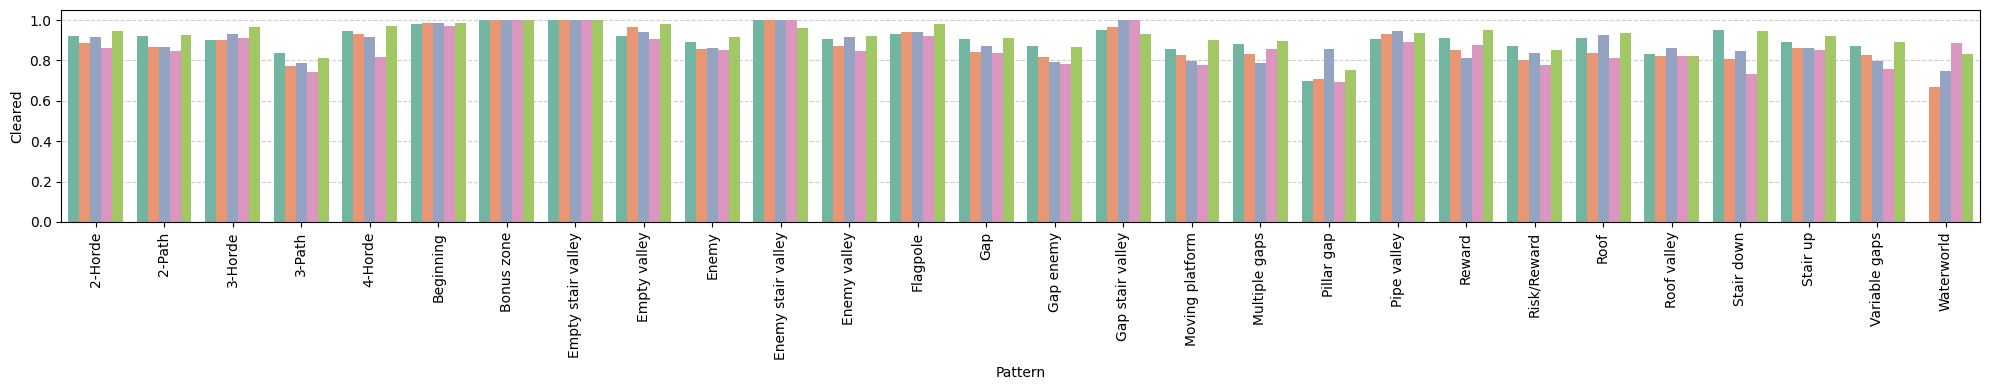

In [8]:
### Difficulty per pattern, per subject

fig, ax = plt.subplots(figsize=(20, 4))
plot_cleared_by_pattern(humans_df, scenes_mastersheet, ax=ax, split_by='Subject', palette='Set2', sort=True, sort_by='name', title="", legend=False)
plt.savefig('../outputdata/figures/cleared_by_pattern_per_subject.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()
        

/tmp/ipykernel_54871/2727967223.py:123: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


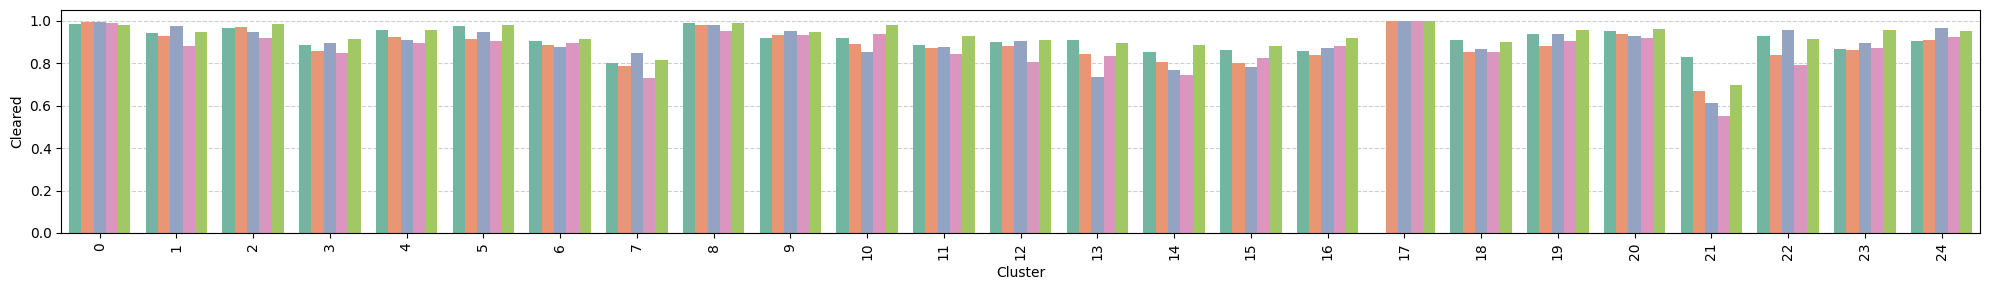

In [9]:
### Difficulty per pattern, per subject

fig, ax = plt.subplots(figsize=(20, 3))
plot_cleared_by_pattern(humans_df, scenes_mastersheet, ax=ax, split_by='Subject', palette='Set2', sort=True, sort_by='name', title="", clusters=clusters, cluster_id=20, legend=False)
plt.savefig('../outputdata/figures/cleared_by_cluster_per_subject.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()


/tmp/ipykernel_54871/2727967223.py:123: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


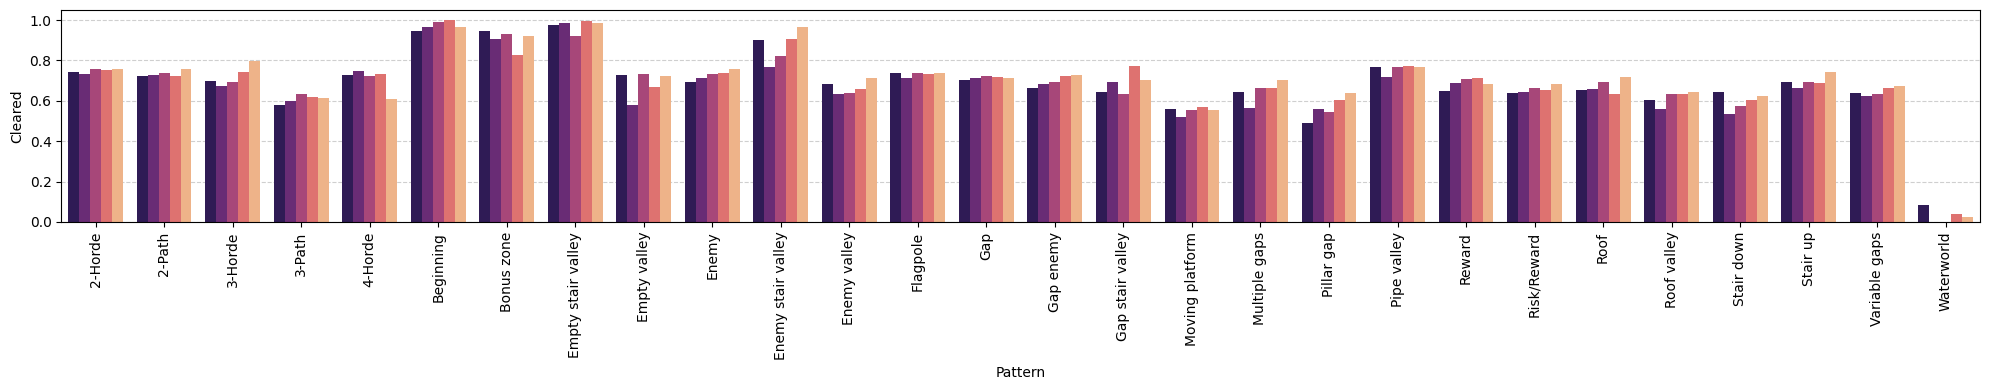

In [10]:
### Difficulty per pattern, per model vs per subject phase
fig, ax = plt.subplots(figsize=(20, 4))
plot_cleared_by_pattern(models_df, scenes_mastersheet, ax=ax, split_by='Model', palette='magma', title="", sort_by='name', legend_name='PPO', legend=False)
plt.show()

/tmp/ipykernel_54871/2727967223.py:123: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


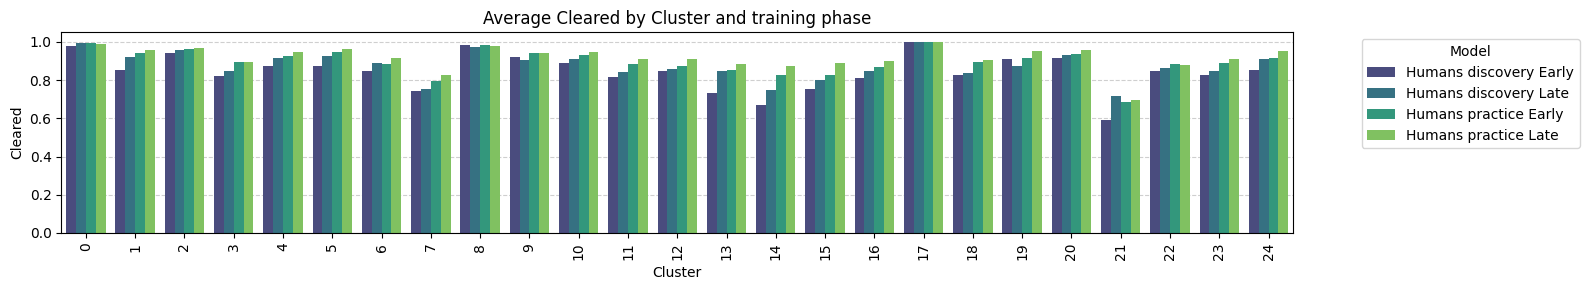

In [11]:
### Difficulty per scene cluster, per model vs per subject phase
fig, ax = plt.subplots(figsize=(16, 3))
plot_cleared_by_pattern(phasesplit_df, scenes_mastersheet, ax=ax, split_by='Model', palette='viridis', clusters=clusters, title="Average Cleared by Cluster and training phase", cluster_id=20, sort=True, sort_by='name')
plt.show()

/tmp/ipykernel_54871/2727967223.py:123: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


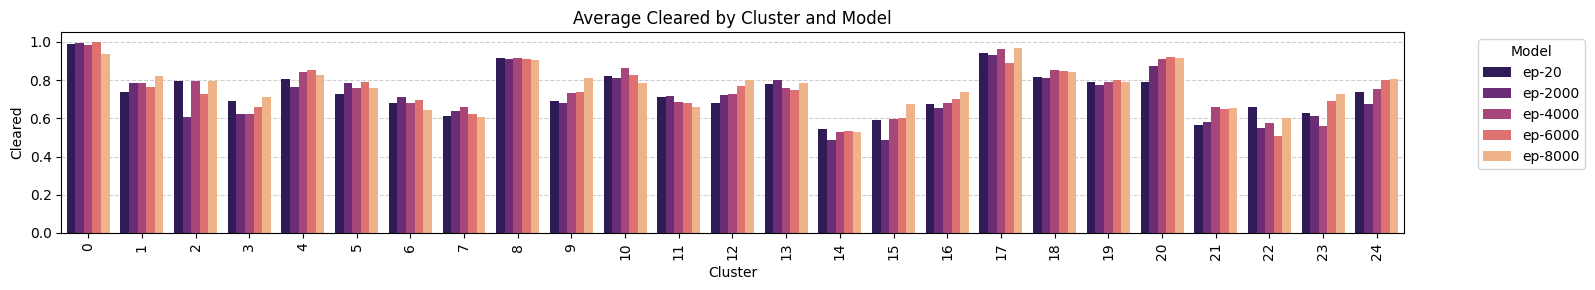

In [12]:
fig, ax = plt.subplots(figsize=(16, 3))
plot_cleared_by_pattern(models_df, scenes_mastersheet, ax=ax, split_by='Model', palette='magma', clusters=clusters, title="Average Cleared by Cluster and Model", cluster_id=20, sort=True, sort_by='name')
plt.show()


/tmp/ipykernel_54871/2727967223.py:123: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


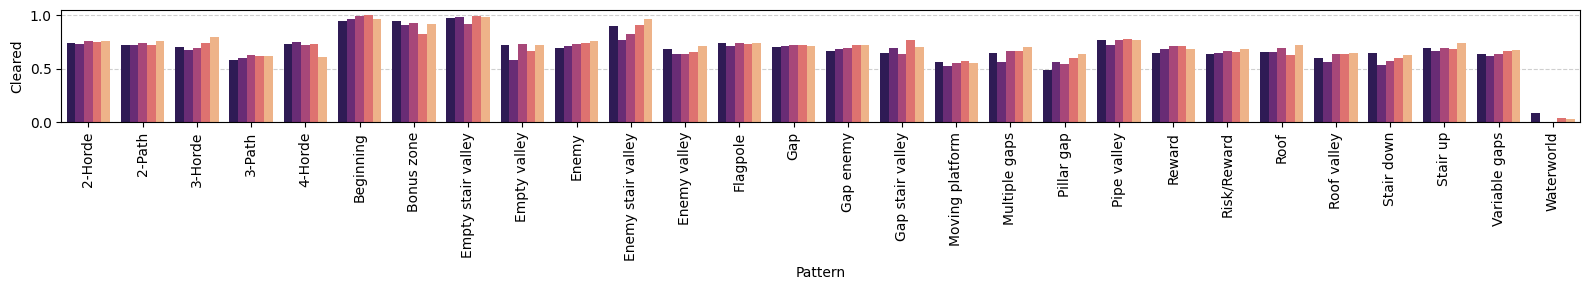

In [13]:
fig, ax = plt.subplots(figsize=(16, 3))
plot_cleared_by_pattern(models_df, scenes_mastersheet, ax=ax, split_by='Model', palette='magma', title="", cluster_id=20, sort=True, sort_by='name', legend=False)
plt.savefig('../outputdata/figures/cleared_by_pattern_per_model.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()


/tmp/ipykernel_54871/2727967223.py:123: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


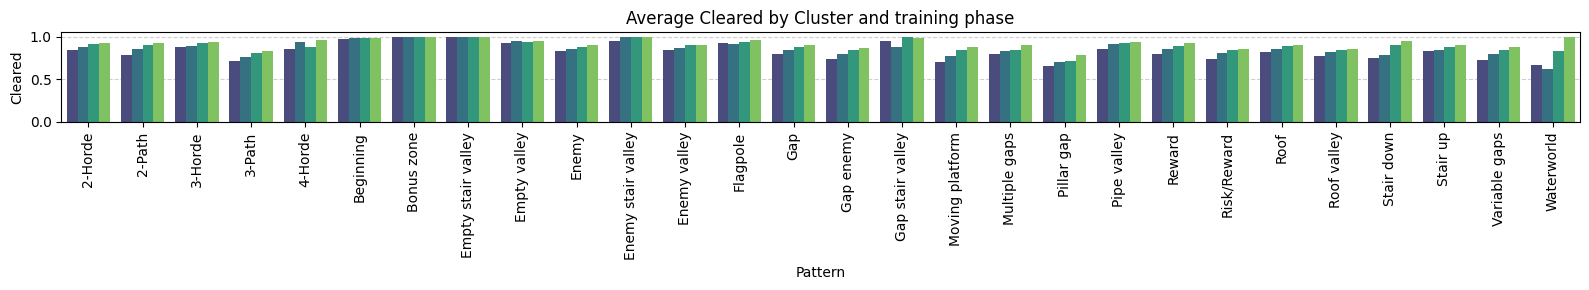

In [14]:
### Difficulty per scene cluster, per model vs per subject phase
fig, ax = plt.subplots(figsize=(16, 3))
plot_cleared_by_pattern(phasesplit_df, scenes_mastersheet, ax=ax, split_by='Model', palette='viridis', title="Average Cleared by Cluster and training phase", cluster_id=20, sort=True, sort_by='name', legend=False)
plt.show()

/tmp/ipykernel_54871/2727967223.py:123: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


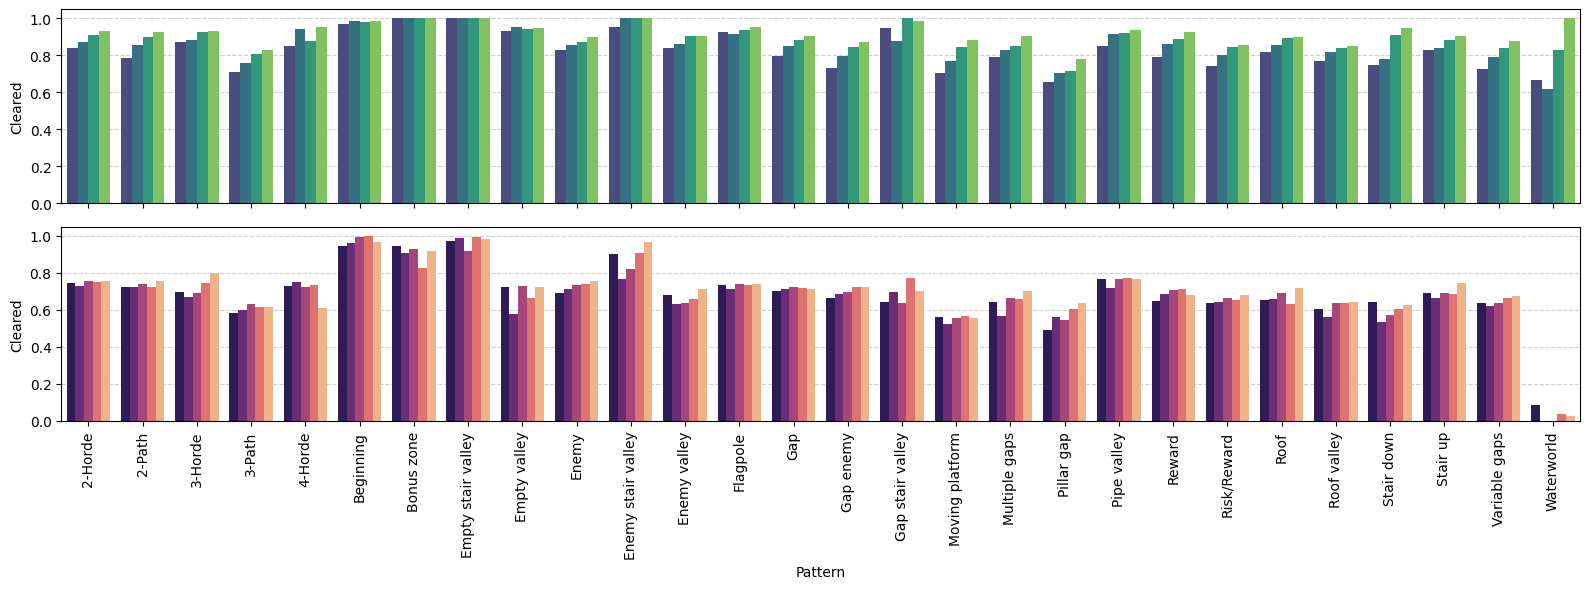

In [15]:
### Difficulty per scene cluster, per model vs per subject phase
fig, axes = plt.subplots(2, 1, figsize=(16, 6), sharex=True)
axes = axes.flatten()

plot_cleared_by_pattern(phasesplit_df, scenes_mastersheet, ax=axes[0], split_by='Model', palette='viridis', title="", cluster_id=20, sort=True, sort_by='name', legend=False)


plot_cleared_by_pattern(models_df, scenes_mastersheet, ax=axes[1], split_by='Model', palette='magma', title="", cluster_id=20, sort=True, sort_by='name', legend=False)


plt.savefig('../outputdata/figures/cleared_by_pattern_per_model.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

